In [1]:

import sys

# Insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../py')

In [2]:

%run ../load_magic/storage.py
%run ../load_magic/paths.py
%run ../load_magic/lists.py
%run ../load_magic/environment.py
%run ../load_magic/dataframes.py

import scraping_utils
wikipedia = scraping_utils.wikipedia

from bs4 import BeautifulSoup as bs
import networkx as nx
import re
import urllib.request

notebook_path = get_notebook_path()
print(notebook_path)
s = Storage()
#pandemic_df = s.load_object('pandemic_df')
print(['s.{}'.format(fn) for fn in dir(s) if not fn.startswith('_')])

%pprint
dir()

C:\ProgramData\Anaconda3\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


None
['s.attempt_to_pickle', 's.data_csv_folder', 's.data_folder', 's.encoding_type', 's.load_csv', 's.load_dataframes', 's.load_object', 's.pickle_exists', 's.save_dataframes', 's.saves_csv_folder', 's.saves_folder', 's.saves_pickle_folder', 's.store_objects']
Pretty printing has been turned OFF


['Config', 'In', 'Out', 'RandomForestClassifier', 'SequenceMatcher', 'Storage', '_', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__nonzero__', '__package__', '__spec__', '_dh', '_i', '_i1', '_i2', '_ih', '_ii', '_iii', '_oh', 'bs', 'check_4_doubles', 'check_for_typos', 'conjunctify_nouns', 'copyfile', 'csv', 'encoding', 'example_iterrows', 'exit', 'filepath_regex', 'get_classifier', 'get_column_descriptions', 'get_data_structs_dataframe', 'get_datastructure_prediction', 'get_dir_tree', 'get_git_lfs_track_commands', 'get_importances', 'get_input_sample', 'get_ipython', 'get_max_rsquared_adj', 'get_module_version', 'get_modules_dataframe', 'get_notebook_path', 'get_page_tables', 'get_specific_gitignore_files', 'get_struct_name', 'humanize_bytes', 'io', 'ipykernel', 'json', 'jupyter_config_dir', 'math', 'notebook_path', 'notebookapp', 'np', 'nx', 'os', 'pd', 'pickle', 'plt', 'preprocess_data', 'print_all_files_ending_starting_with', 'print_all_files_e

In [3]:

from datetime import date

file_path = os.path.join(s.data_folder, 'xlsx', 'unprecedented.xlsx')
# unprecedented_df = pd.read_excel(file_path, sheet_name='by_week')
# unprecedented_df.columns = ['week_date', 'relative_strength', 'possible_cause', 'week_topic']
# unprecedented_df.week_date = pd.to_datetime(unprecedented_df.week_date)
# unprecedented_df.week_date = unprecedented_df.week_date.map(lambda ts: date(ts.year, ts.month, ts.day))
# unprecedented_df.set_index('week_date', drop=True, inplace=True)
# unprecedented_df

In [99]:

unprecedented_df = pd.read_excel(file_path, sheet_name='by_month')
unprecedented_df.columns = ['month_date', 'relative_strength', 'possible_cause', 'month_topic']
unprecedented_df.month_date = pd.to_datetime(unprecedented_df.month_date)
unprecedented_df.month_date = unprecedented_df.month_date.map(lambda ts: date(ts.year, ts.month, ts.day))
unprecedented_df.set_index('month_date', drop=True, inplace=True)
unprecedented_df

,relative_strength,possible_cause,month_topic
month_date,,,
2004-01-01,2,NaN,NaN
2004-02-01,4,NaN,NaN
2004-03-01,4,NaN,NaN
2004-04-01,5,NaN,NaN
2004-05-01,5,NaN,NaN
...,...,...,...
2021-11-01,18,NaN,NaN
2021-12-01,18,NaN,NaN
2022-01-01,20,NaN,NaN


In [15]:

import peakutils
from peakutils.plot import plot as pplot
from matplotlib import pyplot
%matplotlib inline

In [96]:

from datetime import date, datetime

def get_int_from_date(date_obj):
    time_struct = date_obj.timetuple()
    datetime_obj = datetime(year=time_struct.tm_year, month=time_struct.tm_mon, day=time_struct.tm_mday)
    
    return int(datetime_obj.timestamp())

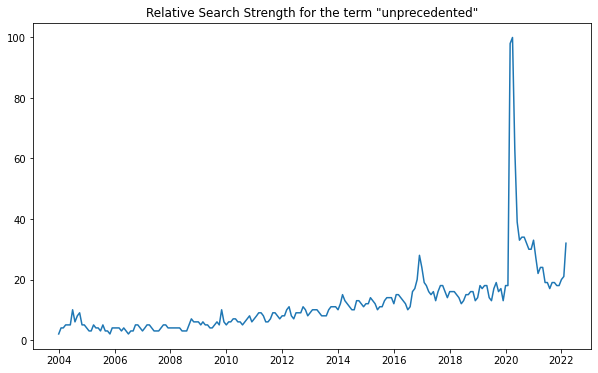

In [97]:

x = unprecedented_df.index.values
y = unprecedented_df.relative_strength.values
pyplot.figure(figsize=(10,6))
pyplot.plot(x, y)
text_obj = pyplot.title('Relative Search Strength for the term "unprecedented"')

In [93]:

from datetime import date

for thres in np.linspace(0.05, 5, 100):
    for min_dist in np.linspace(3, 300, 100):
        indexes_list = peakutils.indexes(y, thres=thres, min_dist=min_dist)
        if (len(indexes_list)<6) and any(map(lambda x: x == f(date(2016, 12, 1)), x[indexes_list])) and not any(map(lambda x: x>195, indexes_list)):
            print(f'indexes_list = peakutils.indexes(y, thres={thres}, min_dist={min_dist})')

[  6  70 122 155 195]
[datetime.date(2004, 7, 1) datetime.date(2009, 11, 1)
 datetime.date(2014, 3, 1) datetime.date(2016, 12, 1)
 datetime.date(2020, 4, 1)]
[ 10  10  15  28 100]


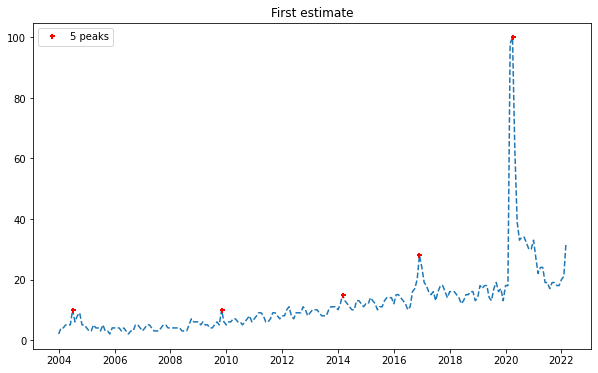

In [94]:

indexes_list = peakutils.indexes(y, thres=0.05, min_dist=24.0)
print(indexes_list)
print(x[indexes_list])
print(y[indexes_list])
pyplot.figure(figsize=(10,6))
pplot(x, y, indexes_list)
text_obj = pyplot.title('First estimate')

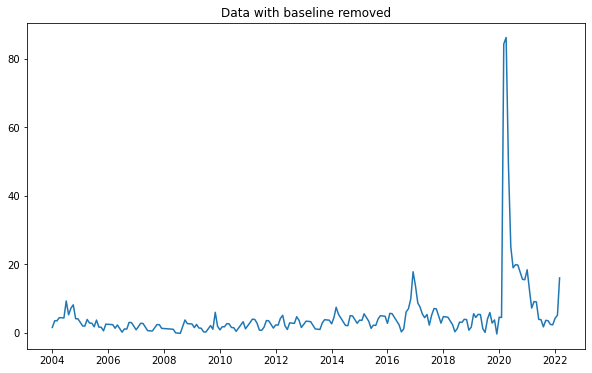

In [98]:

base = peakutils.baseline(y, 2)
pyplot.figure(figsize=(10,6))
pyplot.plot(x, y-base)
text_obj = pyplot.title('Data with baseline removed')


----

In [100]:

mask_series = unprecedented_df.possible_cause.isnull()
unprecedented_df[~mask_series]

,relative_strength,possible_cause,month_topic
month_date,,,
2004-07-01,10,Cassini–Huygens,The unpiloted Cassini–Huygens spacecraft arriv...
2009-11-01,10,Water on Moon,Having analyzed the data from the LCROSS lunar...
2014-03-01,15,Russia suspend from the G8,"During an emergency meeting, the United Kingdo..."
2016-12-01,28,Russian Defence Ministry Tupolev Tu-154 crash,A Tupolev Tu-154 jetliner of the Russian Defen...
2020-04-01,100,COVID-19 pandemic,The number of confirmed cases of COVID-19 pass...


In [101]:

# Use the following only if you are on a high definition device
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

In [102]:

import matplotlib.dates as mdates

years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')
months_fmt = mdates.DateFormatter('%b')

In [104]:

mask_series = unprecedented_df.possible_cause.isnull() | unprecedented_df.month_topic.isnull()
for month_date, row_series in unprecedented_df[~mask_series].iterrows():
    print('{} (month of {}): {}'.format(row_series.possible_cause, month_date.strftime('%B %d'), row_series.month_topic))

Cassini–Huygens (month of July 01): The unpiloted Cassini–Huygens spacecraft arrives at Saturn.
Water on Moon (month of November 01): Having analyzed the data from the LCROSS lunar impact, NASA announces that it has found a "significant" quantity of water in the Moon's Cabeus crater.
Russia suspend from the G8 (month of March 01): During an emergency meeting, the United Kingdom, the United States, Italy, Germany, France, Japan, and Canada temporarily suspend Russia from the G8, recognizing Crimea within Ukraine's international borders and rejecting the validity of the 2014 Crimean referendum.
Russian Defence Ministry Tupolev Tu-154 crash (month of December 01): A Tupolev Tu-154 jetliner of the Russian Defence Ministry crashes into the Black Sea shortly after taking off from Sochi International Airport, Russia, while en route to Khmeimim Air Base, Syria.
COVID-19 pandemic (month of April 01): The number of confirmed cases of COVID-19 passes 2 million worldwide.


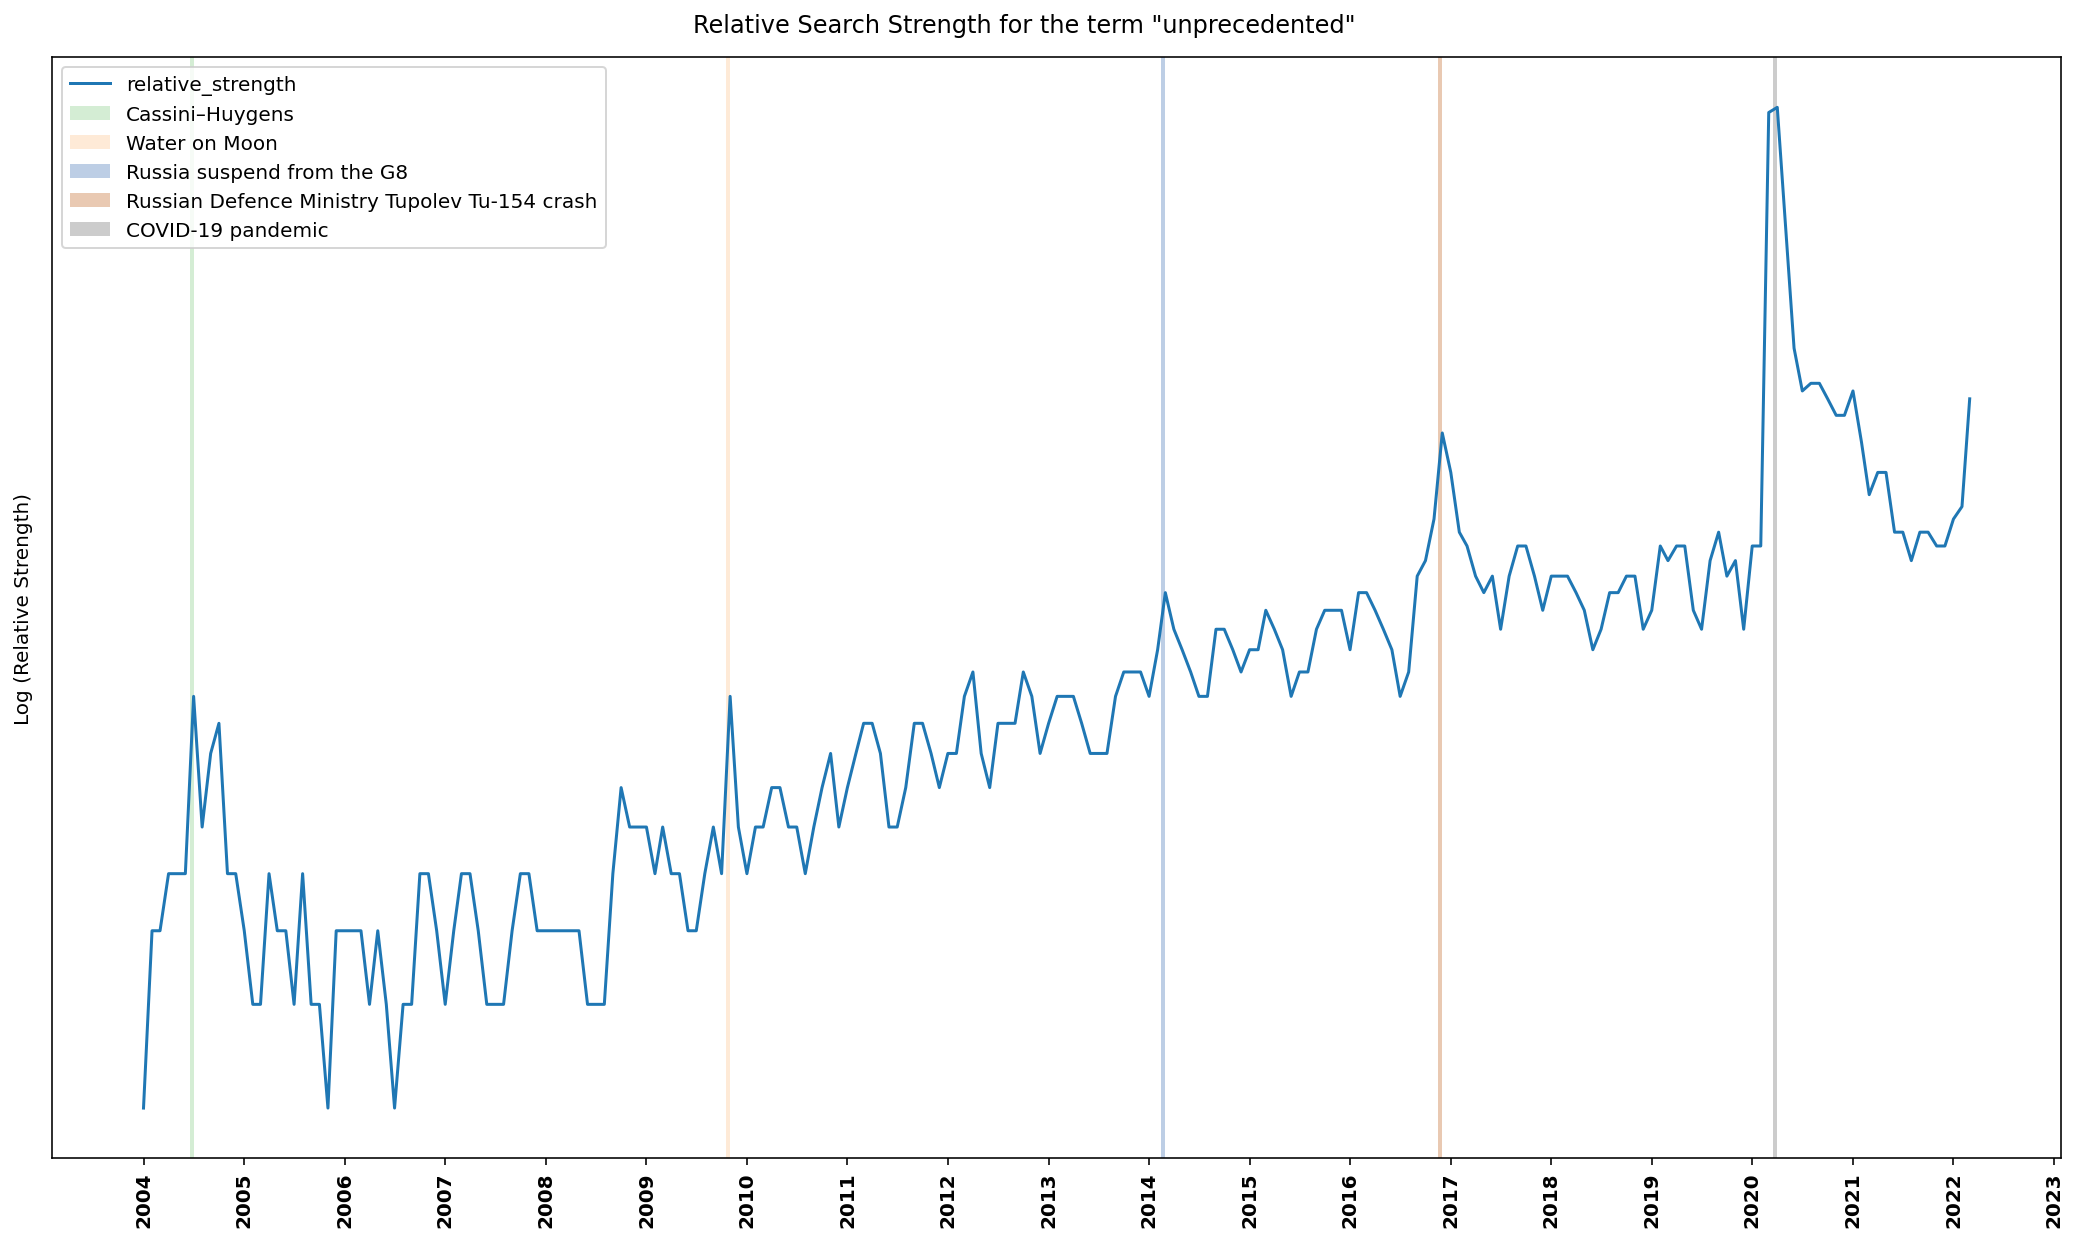

In [109]:

from datetime import timedelta
from cycler import cycler

facebook_aspect_ratio = 1.91
twitter_aspect_ratio = 16/9
fig_width = 18
fig, ax = plt.subplots(figsize=(fig_width, fig_width/twitter_aspect_ratio))
ax.set_yscale('log')
AxesSubplot_obj = unprecedented_df.relative_strength.plot.line(ax=ax)
mask_series = unprecedented_df.possible_cause.isnull()
possible_cause_list = unprecedented_df[~mask_series].possible_cause.unique().tolist()

# Set color cycle
n = len(possible_cause_list)
if n < 9:
    cycler = cycler('color', plt.cm.Accent(np.linspace(0, 1, n)))
elif n < 11:
    cycler = cycler('color', plt.cm.tab10(np.linspace(0, 1, n)))
elif n < 13:
    cycler = cycler('color', plt.cm.Paired(np.linspace(0, 1, n)))
else:
    cycler = cycler('color', plt.cm.tab20(np.linspace(0, 1, n)))

for possible_cause, face_color_dict in zip(possible_cause_list, cycler()):
    face_color = face_color_dict['color']
    mask_series = (unprecedented_df.possible_cause == possible_cause)
    first_one = True
    for end_date in unprecedented_df[mask_series].index.tolist():
        start_date = end_date - timedelta(days=14)
        #print(start_date, end_date, possible_cause)
        if first_one:
            first_one = False
            ax.axvspan(start_date, end_date, facecolor=face_color, alpha=0.33, label=possible_cause)
        else:
            ax.axvspan(start_date, end_date, facecolor=face_color, alpha=0.33)
legend_obj = ax.legend()
ylabel_Text = ax.set_ylabel('Log (Relative Strength)')
ticks_list = ax.yaxis.set_ticks([])
ax.yaxis.set_ticks_position('none')
ylabel_Text = ax.set_xlabel('')
title_text = fig.suptitle('Relative Search Strength for the term "unprecedented"', x=0.5, y=0.91)

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
# ax.xaxis.set_minor_locator(months)
# ax.xaxis.set_minor_formatter(months_fmt)
# ticklabels_list = plt.setp(ax.xaxis.get_minorticklabels(), rotation=90)
ticklabels_list = plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
ticklabels_list = plt.setp(ax.xaxis.get_majorticklabels(), fontweight='bold')

In [ ]:

file_path = os.path.join(s.data_csv_folder, 'unprecedented.csv')
monthed_df = pd.read_csv(file_path, usecols=['Month', 'Relative Strength'],
                         parse_dates=['Month'], index_col=['Month'],
                         squeeze=True).sort_index().to_frame()
s.save_dataframes(include_index=True, monthed_df=monthed_df)

In [ ]:

from datetime import date

file_path = os.path.join(s.data_folder, 'xlsx', 'monthed.xlsx')
monthed_df = pd.read_excel(file_path)
monthed_df.columns = ['month_date', 'relative_strength', 'possible_cause', 'month_topic']
monthed_df.month_date = pd.to_datetime(monthed_df.month_date)
monthed_df.month_date = monthed_df.month_date.map(lambda ts: date(ts.year, ts.month, ts.day))
monthed_df.set_index('month_date', drop=True, inplace=True)
monthed_df

In [ ]:

mask_series = monthed_df.possible_cause.isnull()
monthed_df[~mask_series]

In [ ]:

%run ../load_magic/charts.py
import matplotlib as mpl
from datetime import timedelta
from matplotlib.colors import LogNorm

fig_width = 18
fig, ax = plt.subplots(figsize=(fig_width, fig_width/TWITTER_ASPECT_RATIO))
ax.set_yscale('log')

# Plot dots and line
index = monthed_df.relative_strength.index
values = monthed_df.relative_strength.values
colormap = r()
print(colormap)
cmap = mpl.cm.get_cmap(colormap)
norm = LogNorm(vmin=values.min(), vmax=values.max())
ball_and_chain(ax, index, values, c=cmap(norm(values)))

# Label the possible causes
mask_series = monthed_df.possible_cause.isnull()
possible_cause_list = monthed_df[~mask_series].possible_cause.unique().tolist()

# Get color cycler
color_cycler = get_color_cycler(len(possible_cause_list))

for possible_cause, face_color_dict in zip(possible_cause_list, color_cycler()):
    face_color = face_color_dict['color']
    mask_series = (monthed_df.possible_cause == possible_cause)
    first_one = True
    for end_date in monthed_df[mask_series].index.tolist():
        start_date = end_date - timedelta(days=30)
        if first_one:
            first_one = False
            label = possible_cause
        else:
            label = None
        ax.axvspan(start_date, end_date, facecolor=face_color, alpha=0.25, label=label)

legend_obj = ax.legend()
ylabel_Text = ax.set_ylabel('Log (Relative Strength)')
ticks_list = ax.yaxis.set_ticks([])
ax.yaxis.set_ticks_position('none')
ylabel_Text = ax.set_xlabel('')
title_text = fig.suptitle('Relative Search Strength for the term 'unprecedented'', x=0.5, y=0.91)

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ticklabels_list = plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
ticklabels_list = plt.setp(ax.xaxis.get_majorticklabels(), fontweight='bold')

#save_fig_as_various(fig, 'relative_search_strength_of_unprecedented', verbose=True)